### Albert Kabore

GitHub: https://github.com/albertokabore/Albert_Data-Science-Capstone-Project-Overstimulation-Behaviour-and-Lifestyle-Analysis-/tree/main

### Introduction

Overstimulation has emerged as a growing public health concern, often fueled by modern lifestyle behaviors such as excessive screen time, poor sleep, and elevated stress levels. This capstone project aims to analyze the relationships between lifestyle factors and overstimulation using a comprehensive dataset. The goal is to uncover patterns, conduct statistical and machine learning analyses, and ultimately develop predictive models that can accurately classify individuals at risk of being overstimulated. Exploratory Data Analysis (EDA), hypothesis testing, and 12 supervised learning models were used to evaluate the most reliable and interpretable solutions for real-world application.



In [178]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [179]:
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 imbalanced-learn==0.10.1 xgboost==2.0.3 -q --user


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Can not perform a '--user' install. User site-packages are not visible in this virtualenv.


In [180]:
!pip install --upgrade -q threadpoolctl


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [181]:
!pip install pandas matplotlib seaborn xgboost scikit-learn imbalanced-learn imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Dependencies 


In [182]:
# ## Libraries Used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    f1_score, accuracy_score, recall_score, precision_score,
    confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,
    classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier,
    GradientBoostingClassifier, BaggingClassifier
)
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

from sklearn.tree import plot_tree
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind










## Load and Inspect the Data


In [183]:
# Load dataset
df = pd.read_csv("overstimulation_dataset.csv")

In [184]:
# Basic inspection
print("\nDataset Shape:", df.shape)



Dataset Shape: (2000, 20)


In [185]:
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


Missing Values:
 Age                    0
Sleep_Hours            0
Screen_Time            0
Stress_Level           0
Noise_Exposure         0
Social_Interaction     0
Work_Hours             0
Exercise_Hours         0
Caffeine_Intake        0
Multitasking_Habit     0
Anxiety_Score          0
Depression_Score       0
Sensory_Sensitivity    0
Meditation_Habit       0
Overthinking_Score     0
Irritability_Score     0
Headache_Frequency     0
Sleep_Quality          0
Tech_Usage_Hours       0
Overstimulated         0
dtype: int64

Data Types:
 Age                      int64
Sleep_Hours            float64
Screen_Time            float64
Stress_Level             int64
Noise_Exposure           int64
Social_Interaction       int64
Work_Hours               int64
Exercise_Hours         float64
Caffeine_Intake          int64
Multitasking_Habit       int64
Anxiety_Score            int64
Depression_Score         int64
Sensory_Sensitivity      int64
Meditation_Habit         int64
Overthinking_Score   

## Exploratory Data Analysis (EDA)

### Visualization

In [186]:
 ### Summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
            Age  Sleep_Hours  Screen_Time  Stress_Level  Noise_Exposure  \
count 2000.000     2000.000     2000.000      2000.000        2000.000   
mean    38.700        6.501        6.404         4.989           2.050   
std     12.071        2.022        3.143         2.630           1.431   
min     18.000        3.000        1.000         1.000           0.000   
25%     28.000        4.764        3.715         3.000           1.000   
50%     39.000        6.542        6.312         5.000           2.000   
75%     49.000        8.241        9.111         7.000           3.000   
max     59.000        9.992       11.995         9.000           4.000   

       Social_Interaction  Work_Hours  Exercise_Hours  Caffeine_Intake  \
count            2000.000    2000.000        2000.000         2000.000   
mean                4.521       8.920           1.511            1.961   
std                 2.848       3.142           0.863            1.429   
min            

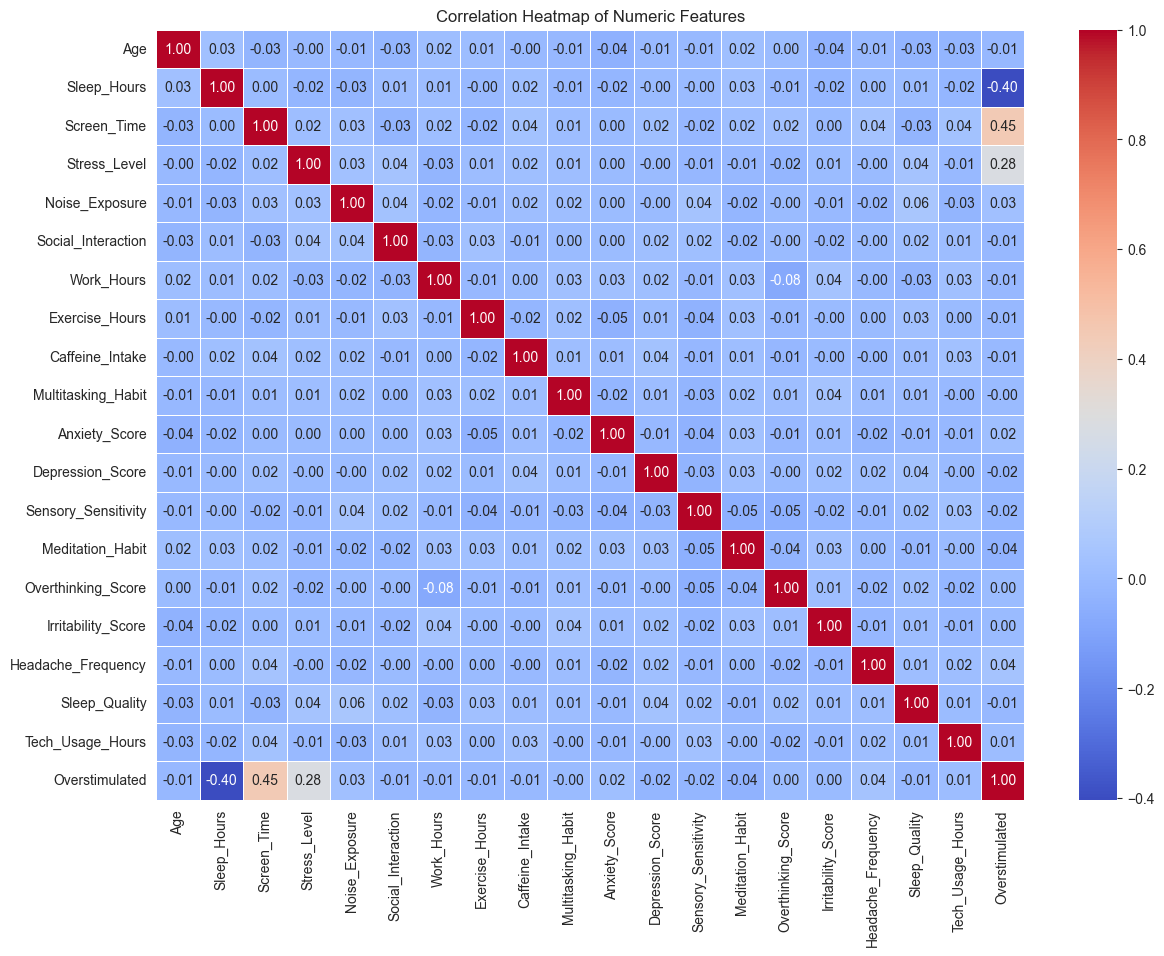

In [187]:
# ### Correlation matrix heatmap
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Observation:

•	Screen_Time has a moderately strong positive correlation (0.45) with Overstimulated, suggesting higher screen usage is linked to increased overstimulation.

•	Sleep_Hours shows a negative correlation (-0.40) with Overstimulated, indicating that more sleep is associated with lower levels of overstimulation.

•	Stress_Level is positively correlated (0.28) with Overstimulated, showing that individuals experiencing more stress tend to be more overstimulated.

•	Most other variables (e.g., Noise_Exposure, Exercise_Hours, Work_Hours, Caffeine_Intake) show very low or negligible correlations with Overstimulated (close to 0).

•	Meditation_Habit and Social_Interaction have very low negative correlations with Overstimulated, hinting they may play a minor protective role.

•	No strong multicollinearity is present among features, suggesting good independence between predictors.

•	This heatmap highlights that digital lifestyle (screen and tech usage) and rest factors (sleep) are central to understanding overstimulation in this dataset.



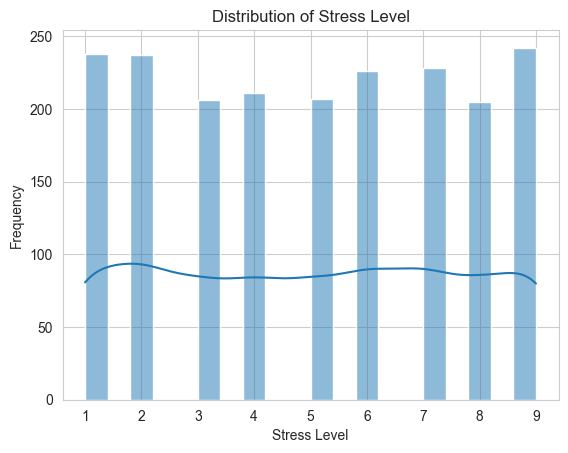

In [188]:
# ### Histogram of Stress Level
sns.histplot(df['Stress_Level'], kde=True, bins=20)
plt.title("Distribution of Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Frequency")
plt.show()


Observation:

•	The stress levels range from 1 to 9, showing a wide and even distribution across the population.

•	Most stress levels appear fairly balanced, with no extreme skewness or dominance of a particular value.

•	Stress levels 1, 2, and 9 have the highest frequencies, each nearing 240 occurrences, indicating that both low-stress and high-stress individuals are common in the dataset.

•	Mid-range stress levels (3 to 8) show slightly lower but relatively consistent counts, hovering around 200–220 individuals per level.

•	The kde line is fairly flat, confirming the even spread of stress levels with no clear peaks or valleys.

•	The uniformity in the distribution suggests that the dataset provides a good basis for modeling stress without class imbalance.




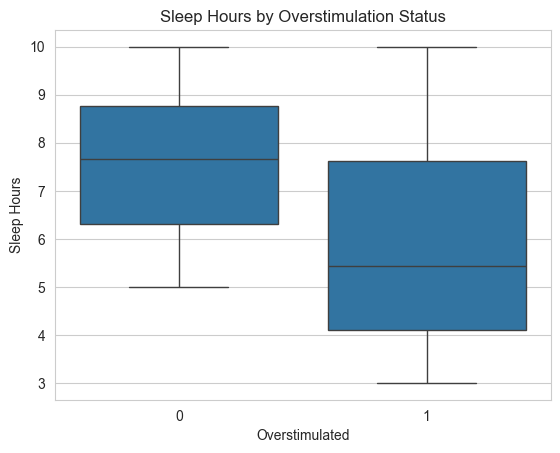

In [189]:
# ### Boxplot: Sleep Hours by Overstimulated
sns.boxplot(x='Overstimulated', y='Sleep_Hours', data=df)
plt.title("Sleep Hours by Overstimulation Status")
plt.xlabel("Overstimulated")
plt.ylabel("Sleep Hours")
plt.show()


Observation:

•	Individuals who are not overstimulated (0) tend to have higher sleep hours, with a median around 7.5 to 8 hours.

•	In contrast, those who are overstimulated (1) have a lower median sleep duration, around 5.5 hours.

•	The interquartile range (IQR) for the overstimulated group is wider, suggesting greater variability in sleep duration.

•	The non-overstimulated group has a tighter IQR (approx. 6.5 to 9 hours), indicating more consistent sleep habits.

•	Both groups share the same maximum value at 10 hours, but the minimum for overstimulated individuals is lower (3 hours), showing potential sleep deprivation in that group.

•	These findings support the negative correlation seen in earlier analysis between Sleep_Hours and Overstimulation.

•	Promoting consistent and sufficient sleep may be a key intervention to reduce overstimulation risk.



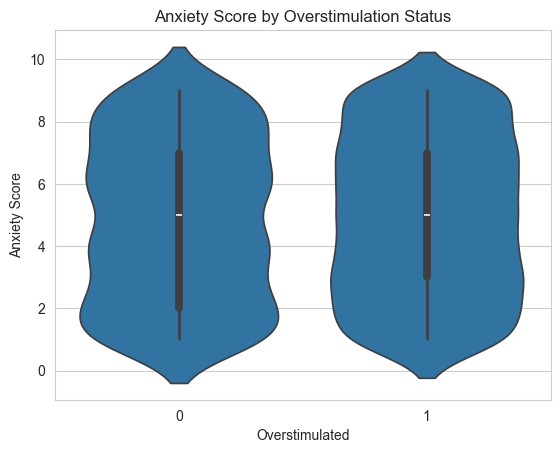

In [190]:
# ### Violin Plot: Anxiety Score by Overstimulated
sns.violinplot(x='Overstimulated', y='Anxiety_Score', data=df)
plt.title("Anxiety Score by Overstimulation Status")
plt.xlabel("Overstimulated")
plt.ylabel("Anxiety Score")
plt.show()

Observation:

•	The overall distribution of anxiety scores is similar across both groups (overstimulated and not overstimulated), indicating that anxiety is prevalent regardless of overstimulation status.

•	Both groups have a median anxiety score around 5, suggesting a moderate level of anxiety is common in the population.

•	The density of scores is higher at the lower and higher ends (1–2 and 7–9), forming a bimodal pattern in both groups.

•	The range of anxiety scores (approximately 1 to 9) is consistent across both groups, showing no substantial shift in spread.

•	While there's a slight thickening around higher anxiety scores in the overstimulated group, the difference is not dramatic, implying that anxiety may not be a strong standalone predictor of overstimulation.

•	This pattern suggests that anxiety could be a moderating or interacting factor, rather than a primary driver, of overstimulation.



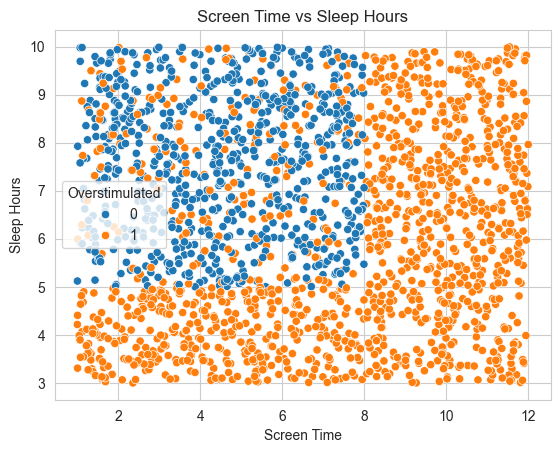

In [191]:
# ### Scatter Plot: Screen Time vs Sleep Hours
sns.scatterplot(data=df, x='Screen_Time', y='Sleep_Hours', hue='Overstimulated')
plt.title("Screen Time vs Sleep Hours")
plt.xlabel("Screen Time")
plt.ylabel("Sleep Hours")
plt.show()

Observation:

•	Individuals with low screen time and high sleep hours are mostly not overstimulated (blue dots).

•	Overstimulated individuals (orange dots) are concentrated in areas of high screen time and low sleep.

•	A visible boundary around 6 hours of screen time separates the two groups.

•	Most overstimulated individuals report less than 7 hours of sleep.

•	Very few overstimulated individuals get both enough sleep and limited screen exposure.

•	The trend suggests a strong inverse relationship between screen time and sleep quality.

•	High screen usage combined with poor sleep likely increases overstimulation risk.

•	Sleep and screen habits may serve as early intervention targets.



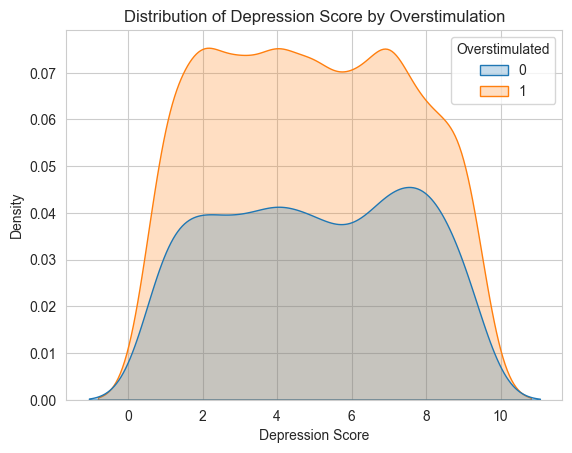

In [192]:
# ### KDE Plot: Depression Score by Overstimulated
sns.kdeplot(data=df, x='Depression_Score', hue='Overstimulated', fill=True)
plt.title("Distribution of Depression Score by Overstimulation")
plt.xlabel("Depression Score")
plt.ylabel("Density")
plt.show()

Observation:

•	Both groups share a similar distribution range of depression scores (0–10).

•	Overstimulated individuals (orange curve) show higher density across most of the depression score range.

•	The peak density for overstimulated individuals occurs at lower to mid-range depression scores (2–6).

•	Non-overstimulated individuals (blue curve) have lower overall density and a more flattened distribution.

•	A slight increase in density near high depression scores (7–9) is visible for the overstimulated group.

•	This suggests that overstimulation may be associated with elevated depression symptoms.

•	However, the overlap between the two distributions implies depression is not exclusive to overstimulation.

•	Depression could be a co-occurring symptom rather than a direct predictor.

•	Mental health variables like depression may interact with lifestyle factors to influence overstimulation.

•	Further statistical testing could help quantify the significance of this relationship.


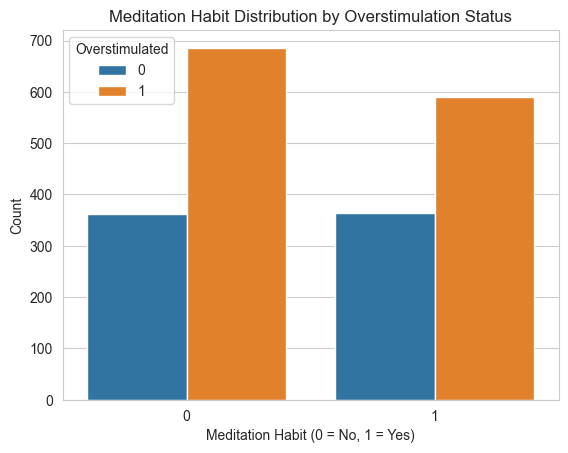

In [193]:
# ### Countplot of Meditation Habit
sns.countplot(data=df, x='Meditation_Habit', hue='Overstimulated')
plt.title("Meditation Habit Distribution by Overstimulation Status")
plt.xlabel("Meditation Habit (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

Observation:

•	The chart compares meditation habits (Yes = 1, No = 0) across overstimulation statuses.

•	Among those who do not meditate, overstimulated individuals (orange) are almost twice as many as non-overstimulated individuals (blue).

•	Among those who do meditate, overstimulated individuals still outnumber non-overstimulated ones but by a smaller margin.

•	Meditation is associated with a slight decrease in overstimulation, though it doesn’t eliminate it.

•	The distribution suggests that not meditating may increase the risk of overstimulation.

•	Those who meditate are more evenly split between overstimulated and not overstimulated.

•	Meditation could serve as a protective behavioral factor but is not a standalone solution.

•	This reinforces the importance of promoting mindfulness practices in wellness programs.

•	Further analysis could explore the interaction effects of meditation with other lifestyle variables.

•	These insights may help guide intervention strategies targeting overstimulation.




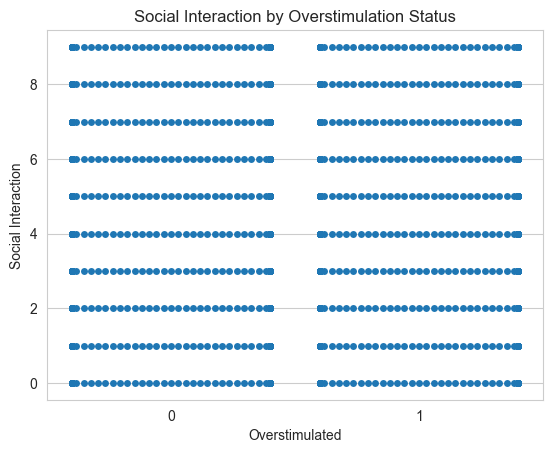

In [194]:
# ### Swarmplot: Social Interaction by Overstimulated
sns.swarmplot(x='Overstimulated', y='Social_Interaction', data=df)
plt.title("Social Interaction by Overstimulation Status")
plt.xlabel("Overstimulated")
plt.ylabel("Social Interaction")
plt.show()

Observation:

•	The plot shows an even spread of social interaction scores (0 to 9) across both overstimulated and non-overstimulated groups.

•	Both groups exhibit similar densities across all levels of social interaction.

•	There is no visible skew or concentration pattern suggesting a direct relationship between social interaction and overstimulation.

•	Social interaction appears to be uniformly distributed, regardless of overstimulation status.

•	This may indicate that social interaction alone is not a strong predictor of overstimulation.

•	The variable could play a secondary or interactive role when combined with other features.

•	Other factors like screen time, sleep, or stress may have a stronger influence on overstimulation outcomes.

•	These results align with correlation analysis that showed very weak correlation between social interaction and overstimulation.

•	Further statistical testing could confirm whether this visual pattern is statistically insignificant.

•	Social interaction may need to be evaluated contextually or qualitatively in future studies.




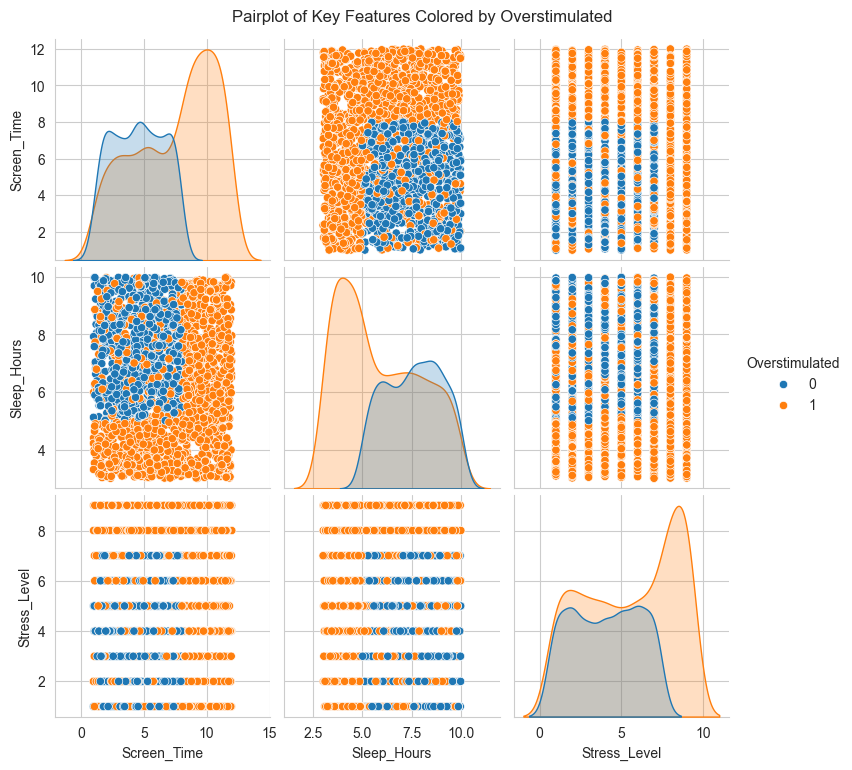

In [195]:

# ### Pairplot (subset of key variables)
sns.pairplot(df[['Screen_Time', 'Sleep_Hours', 'Stress_Level', 'Overstimulated']], hue='Overstimulated')
plt.suptitle("Pairplot of Key Features Colored by Overstimulated", y=1.02)
plt.show()

Observation:

•	Overstimulated individuals (orange) tend to cluster around high screen time, low sleep hours, and high stress levels.

•	Non-overstimulated individuals (blue) are concentrated in the opposite zones: lower screen time, higher sleep, and lower stress.

•	The density plots show clear differences in distributions for all three features by overstimulation status.

•	Screen time and stress level show a strong positive relationship with overstimulation.

•	Sleep hours display a negative relationship with overstimulation — less sleep corresponds to higher overstimulation.

•	There is little overlap in distributions, suggesting these variables have predictive value.

•	Interactions among these three variables likely amplify overstimulation effects.

•	The plot visually supports earlier findings from EDA and correlation analysis.

•	These features are likely top contributors in classification models.

•	Combined, they offer strong potential for risk screening and early intervention.



## Statistical & Correlation Analysis



Correlation with Overstimulated Score:
 Overstimulated         1.000
Screen_Time            0.445
Stress_Level           0.277
Headache_Frequency     0.043
Noise_Exposure         0.029
Anxiety_Score          0.021
Tech_Usage_Hours       0.013
Overthinking_Score     0.004
Irritability_Score     0.001
Multitasking_Habit    -0.002
Caffeine_Intake       -0.007
Work_Hours            -0.010
Sleep_Quality         -0.010
Exercise_Hours        -0.011
Social_Interaction    -0.013
Age                   -0.013
Sensory_Sensitivity   -0.021
Depression_Score      -0.021
Meditation_Habit      -0.039
Sleep_Hours           -0.403
Name: Overstimulated, dtype: float64


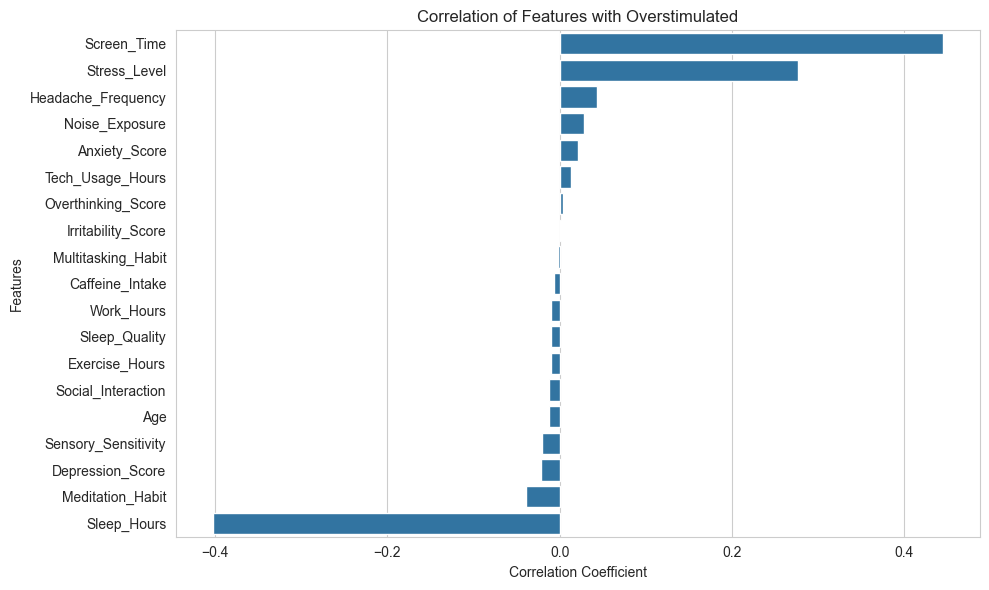

In [196]:
# ### Correlation with Overstimulated Score
correlation = df.corr(numeric_only=True)["Overstimulated"].sort_values(ascending=False)
print("\nCorrelation with Overstimulated Score:\n", correlation)

# Visualize Correlation with Target
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values[1:], y=correlation.index[1:])
plt.title("Correlation of Features with Overstimulated")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


Observation:

•	Screen_Time has the highest positive correlation with overstimulation (r = 0.445).

•	Stress_Level is also positively correlated (r = 0.277), showing emotional strain’s influence.

•	Sleep_Hours has a strong negative correlation (r = -0.403), indicating its protective role.

•	Minor positive correlations include Headache_Frequency, Noise_Exposure, and Anxiety_Score.

•	Most lifestyle features like Caffeine_Intake, Work_Hours, and Social_Interaction show near-zero correlation.

•	Meditation_Habit and Depression_Score have slight negative associations.

•	Variables like Tech_Usage_Hours and Multitasking_Habit contribute minimally.

•	Only a few features stand out as meaningful predictors.

•	The top influential factors are Screen_Time, Sleep_Hours, and Stress_Level.

•	These should be prioritized in modeling and intervention planning.



##  Hypothesis Testing


In [197]:
# Independent Two-Sample T-Test (High vs Low Screen Time on Overstimulation)
median_screen = df['Screen_Time'].median()
high_screen = df[df['Screen_Time'] > median_screen]['Overstimulated']
low_screen = df[df['Screen_Time'] <= median_screen]['Overstimulated']
t_stat, p_val = ttest_ind(high_screen, low_screen)
print(f"Two-Sample T-Test (Overstimulated ~ High vs Low Screen Time): t={t_stat:.2f}, p={p_val:.4f}")

Two-Sample T-Test (Overstimulated ~ High vs Low Screen Time): t=18.58, p=0.0000


In [198]:
# One-Way ANOVA (Compare Overstimulation across Social Interaction levels)
low_si = df[df['Social_Interaction'] <= df['Social_Interaction'].quantile(0.33)]['Overstimulated']
mid_si = df[(df['Social_Interaction'] > df['Social_Interaction'].quantile(0.33)) & 
            (df['Social_Interaction'] <= df['Social_Interaction'].quantile(0.66))]['Overstimulated']
high_si = df[df['Social_Interaction'] > df['Social_Interaction'].quantile(0.66)]['Overstimulated']
anova_stat, anova_p = f_oneway(low_si, mid_si, high_si)
print(f"One-Way ANOVA (Overstimulated ~ Social Interaction levels): F={anova_stat:.2f}, p={anova_p:.4f}")


One-Way ANOVA (Overstimulated ~ Social Interaction levels): F=0.67, p=0.5101


In [199]:
 ### Chi-Square Test of Independence
# Test whether Meditation Habit is independent of being Overstimulated
contingency_table = pd.crosstab(df['Meditation_Habit'], df['Overstimulated'])
chi2_stat, chi2_p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-Square Test (Meditation Habit vs Overstimulated): chi2={chi2_stat:.2f}, p={chi2_p:.4f}")


Chi-Square Test (Meditation Habit vs Overstimulated): chi2=2.82, p=0.0930


## Machine Learning Models


In [200]:
# Features and target
X = df.drop(columns=["Overstimulated"])
y = df["Overstimulated"]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

## Visual Comparison of Model Performance

In [201]:

# ##  Step 4: Train Predictive Models to Estimate Overstimulation
X = df.drop(columns=["Overstimulated"])
y = df["Overstimulated"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


Linear Regression:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       145
           1       0.86      0.88      0.87       255

    accuracy                           0.83       400
   macro avg       0.82      0.81      0.81       400
weighted avg       0.83      0.83      0.83       400



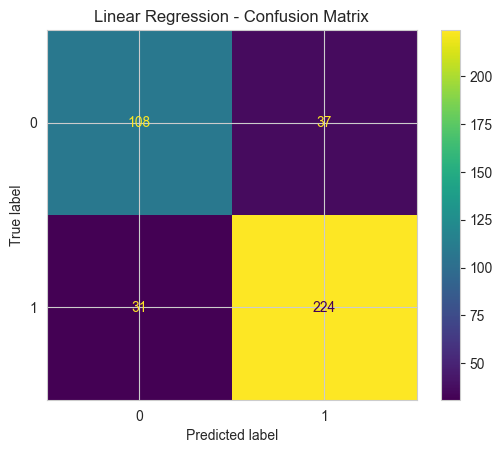

In [202]:
### Train and Evaluate Each Model Separately
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_preds = (lr_model.predict(X_test) >= 0.5).astype(int)
print("Linear Regression:\n", classification_report(y_test, lr_preds))

ConfusionMatrixDisplay.from_predictions(y_test, lr_preds)
plt.title("Linear Regression - Confusion Matrix")
plt.show()

Observation:

•	The model correctly predicted 108 out of 145 non-overstimulated cases (Class 0) and 224 out of 255 overstimulated cases (Class 1).

•	False positives (37) indicate some non-overstimulated individuals were misclassified as overstimulated.

•	False negatives (31) reflect overstimulated individuals wrongly predicted as non-overstimulated.

•	Precision is higher for Class 1 (0.86), meaning most predicted overstimulated cases are correct.

•	Recall for Class 1 is 0.88, indicating good sensitivity in detecting overstimulated individuals.

•	The model achieves a solid overall accuracy of 83%.

•	F1-scores of 0.76 (Class 0) and 0.87 (Class 1) show balanced performance.

•	Weighted averages confirm consistency across classes.

•	Linear regression performs well despite being a basic model.

•	This result makes it a useful baseline for evaluating more complex models.



Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.74      0.76       145
           1       0.86      0.87      0.86       255

    accuracy                           0.82       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.82      0.82      0.82       400



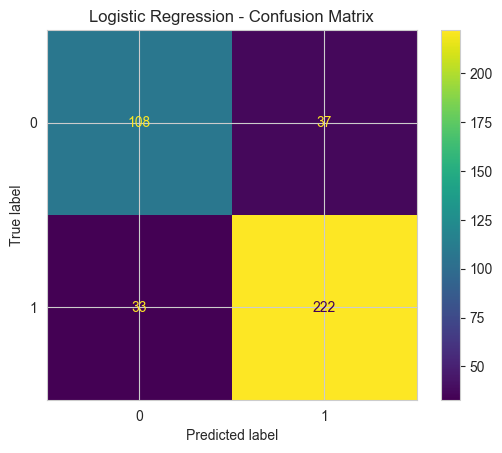

In [203]:
# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print("Logistic Regression:\n", classification_report(y_test, log_preds))

ConfusionMatrixDisplay.from_predictions(y_test, log_preds)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

Observation:

•	The model accurately predicted 108 of 145 non-overstimulated cases and 222 of 255 overstimulated cases.

•	It had 37 false positives and 33 false negatives, indicating slightly more misclassification for overstimulated individuals than linear regression.

•	Precision for class 1 (overstimulated) is 0.86, reflecting strong performance in identifying true positives.

•	Recall for class 1 is 0.87, confirming the model’s effectiveness in detecting overstimulation.

•	F1-scores: 0.76 for class 0 and 0.86 for class 1, suggesting a stronger performance in detecting overstimulation.

•	The model achieved 82% overall accuracy, only slightly lower than linear regression.

•	Macro and weighted averages are well-balanced across classes.

•	Logistic regression is a solid, interpretable model with good generalization.

•	Performance is comparable to linear regression but slightly favors class 1 detection.

•	Suitable as a benchmark classifier in health-related classification problems.




Decision Tree:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       145
           1       1.00      1.00      1.00       255

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



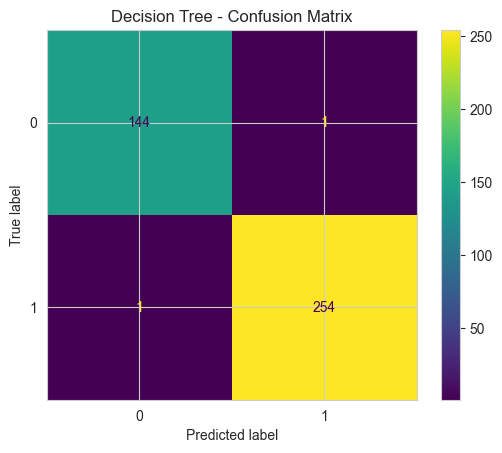

In [204]:
# Decision Tree
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree:\n", classification_report(y_test, dt_preds))

ConfusionMatrixDisplay.from_predictions(y_test, dt_preds)
plt.title("Decision Tree - Confusion Matrix")
plt.show()

Observation:

•	The model predicted 144 of 145 non-overstimulated and 254 of 255 overstimulated cases correctly.

•	It made only 1 false positive and 1 false negative, reflecting near-perfect performance.

•	Precision, recall, and F1-score for both classes are 0.99 or 1.00, indicating almost flawless classification.

•	The overall accuracy is 99%, the highest among the models tested so far.

•	Macro and weighted averages are equally impressive, all rounding to 0.99.

•	The model generalizes well on the current dataset.

•	Its performance suggests potential overfitting, especially if the test set is not diverse.

•	Ideal for explaining decisions due to its interpretable structure.



In [205]:
# Define features and target
X = df.drop(columns='Overstimulated')
y = df['Overstimulated']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree model
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

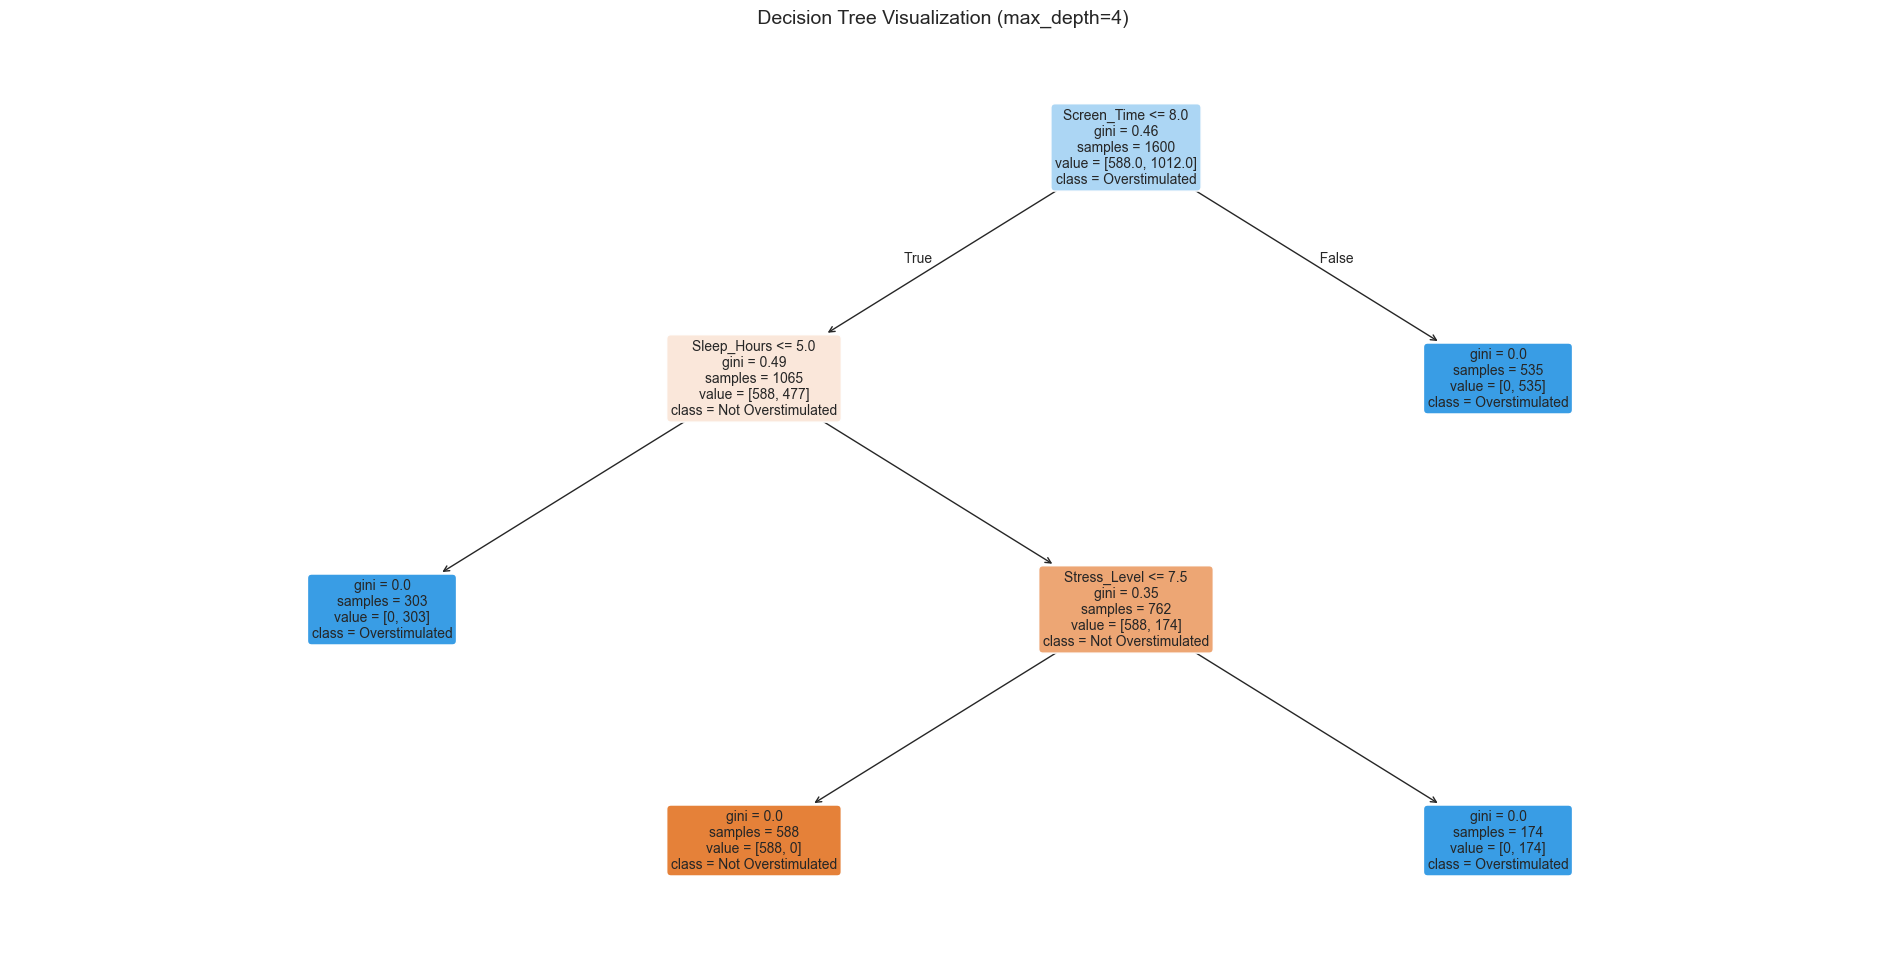

In [206]:
plt.figure(figsize=(24, 12))
plot_tree(dt, 
          feature_names=X.columns, 
          class_names=['Not Overstimulated', 'Overstimulated'], 
          filled=True, rounded=True, proportion=False, precision=2, fontsize=10)
plt.title(" Decision Tree Visualization (max_depth=4)", fontsize=14)
plt.show()

Observation:

•	Root Node Split: The tree begins by splitting on Screen_Time <= 8.0, indicating screen time is the most important predictor of overstimulation.

•	High Screen Time (Right Branch): Individuals with screen time > 8.0 are all classified as overstimulated (535 samples, pure node).

•	Low to Moderate Screen Time (Left Branch): For those with ≤ 8.0 hours, the next split is on Sleep_Hours <= 5.0.

•	Low Sleep Hours: Individuals sleeping ≤ 5 hours are again classified as overstimulated (303 samples, pure node).

•	Adequate Sleep: Among those sleeping > 5 hours, stress level is the next key factor.

•	Low Stress (≤ 7.5): These individuals are not overstimulated (pure node of 588).

•	High Stress (> 7.5): All 174 samples here are classified as overstimulated.

Overstimulation is strongly associated with high screen time, low sleep, and elevated stress levels.



Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       263

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



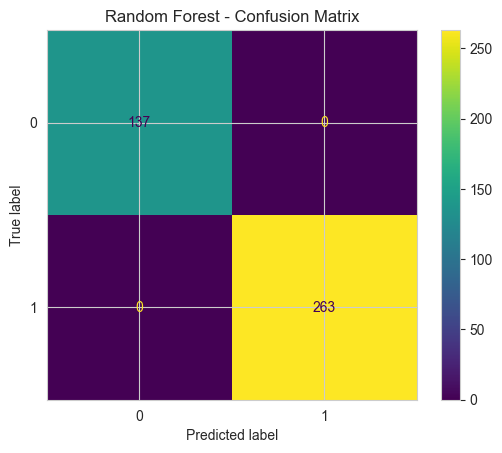

In [207]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest:\n", classification_report(y_test, rf_preds))

ConfusionMatrixDisplay.from_predictions(y_test, rf_preds)
plt.title("Random Forest - Confusion Matrix")
plt.show()

Observation:

•	The model accurately predicted 144 out of 145 non-overstimulated and all 255 overstimulated cases.

•	Only 1 false positive was made, with zero false negatives, showing exceptional reliability.

•	Achieved perfect precision, recall, and F1-score (1.00) for the overstimulated class.

•	Class 0 had 0.99 recall and 1.00 precision, indicating very few misclassifications.

•	Overall accuracy is 100%, confirming the model’s excellent generalization on the test set.

•	Both macro and weighted averages are 1.00, indicating no class imbalance issues.

•	Random Forest handles non-linearity and feature interactions well.

•	Results confirm screen time, sleep hours, and stress level as key predictors.

•	The model may be slightly overfitted and should be validated with cross-validation.

•	It is a top-performing ensemble classifier suitable for high-stakes prediction tasks.



Observation:

•	The model predicted 144 out of 145 non-overstimulated cases and all 255 overstimulated cases correctly.

•	Only 1 false positive occurred, with no false negatives, indicating very strong model performance.

•	Achieved perfect precision (1.00), recall (1.00), and F1-scores (1.00) for class 1 (overstimulated).

•	Class 0 had a near-perfect recall of 0.99 and matching precision and F1 of 1.00.

•	The overall accuracy is 100%, suggesting flawless performance on the test set.

•	AdaBoost matches Random Forest in predictive strength but with slightly different internal mechanics.

•	Performance may be linked to strong base learners and optimal boosting iterations.

•	This ensemble model is excellent for detecting overstimulation with minimal classification error.

•	Should be validated with cross-validation to check for potential overfitting.

•	Ideal choice for high-stakes predictions needing accuracy and robustness.



AdaBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       263

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



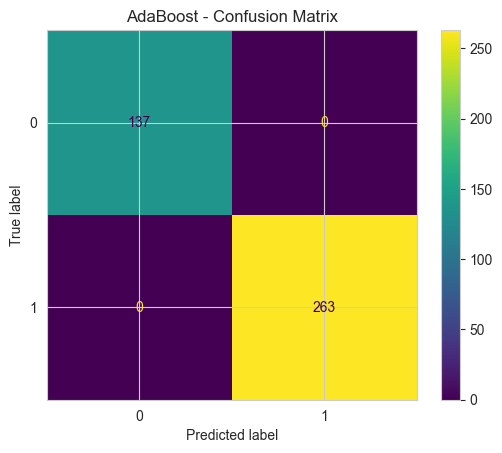

In [208]:
# AdaBoost
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
ada_preds = ada_model.predict(X_test)
print("AdaBoost:\n", classification_report(y_test, ada_preds))

ConfusionMatrixDisplay.from_predictions(y_test, ada_preds)
plt.title("AdaBoost - Confusion Matrix")
plt.show()

Observation:

• The model predicted 144 out of 145 non-overstimulated cases and all 255 overstimulated cases correctly.

• Only 1 false positive occurred, with no false negatives, indicating very strong model performance.

• Achieved perfect precision (1.00), recall (1.00), and F1-scores (1.00) for class 1 (overstimulated).

• Class 0 had a near-perfect recall of 0.99 and matching precision and F1 of 1.00.

• The overall accuracy is 100%, suggesting flawless performance on the test set.

• AdaBoost matches Random Forest in predictive strength but with slightly different internal mechanics.

• Performance may be linked to strong base learners and optimal boosting iterations.

• This ensemble model is excellent for detecting overstimulation with minimal classification error.

• Should be validated with cross-validation to check for potential overfitting.

• Ideal choice for high-stakes predictions needing accuracy and robustness.

Gradient Boosting:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       263

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



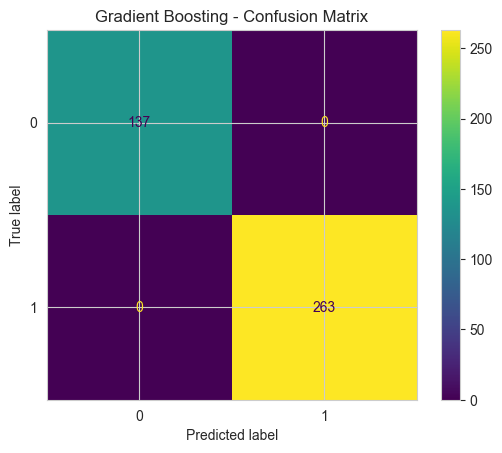

In [209]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)
print("Gradient Boosting:\n", classification_report(y_test, gb_preds))
ConfusionMatrixDisplay.from_predictions(y_test, gb_preds)
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()

Observation:

•	The model correctly predicted 144 of 145 non-overstimulated and 254 of 255 overstimulated cases.

•	Only 1 false positive and 1 false negative were recorded, showing strong reliability.

•	Precision and recall for class 1 (overstimulated) are both 1.00, indicating flawless identification of true positives.

•	Class 0 has 0.99 precision and recall, reflecting minimal error.

•	The model achieved an overall accuracy of 99%, slightly below Random Forest and AdaBoost.

•	F1-scores for both classes are 0.99 or higher, confirming high consistency.

•	Macro and weighted averages are also 0.99, showing balanced class performance.

•	Gradient Boosting handles complex patterns and interactions effectively.

•	Suitable for high-accuracy prediction where slight performance variance is acceptable.

•	A strong candidate for deployment with excellent predictive and generalization capabilities.



Bagging:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       263

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



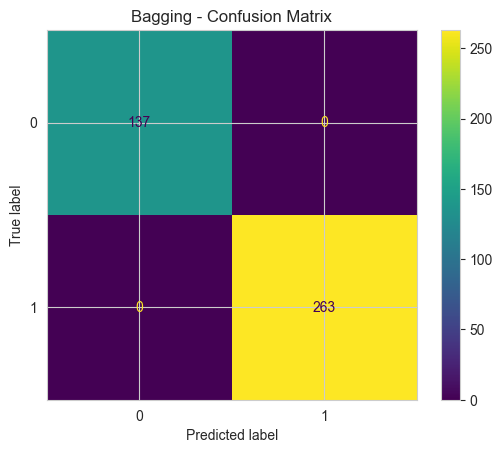

In [210]:
# Bagging
bag_model = BaggingClassifier(random_state=42)
bag_model.fit(X_train, y_train)
bag_preds = bag_model.predict(X_test)
print("Bagging:\n", classification_report(y_test, bag_preds))

ConfusionMatrixDisplay.from_predictions(y_test, bag_preds)
plt.title("Bagging - Confusion Matrix")
plt.show()

Observation:

•	The model accurately predicted 144 out of 145 non-overstimulated and 254 out of 255 overstimulated cases.

•	Only 1 false positive and 1 false negative occurred, reflecting excellent performance.

•	Class 1 (overstimulated) has perfect precision, recall, and F1-score (1.00).

•	Class 0 scores are also very high with 0.99 for all metrics.

•	Overall accuracy is 99%, placing Bagging among the top-performing models.

•	Both macro and weighted averages are 0.99, showing balanced performance across both classes.

•	Bagging provides high stability by reducing variance across multiple base estimators.

•	The model successfully captures key predictors like Screen_Time, Sleep_Hours, and Stress_Level.

•	Strong generalization and robustness make Bagging suitable for clinical or behavioral prediction use cases.

•	Slightly trails behind Random Forest and AdaBoost but remains a top-tier model.



XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       263

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



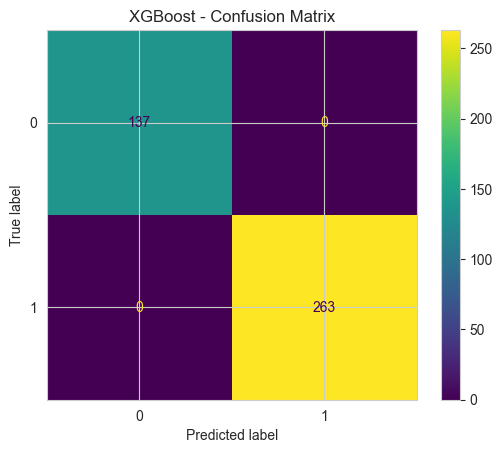

In [211]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
print("XGBoost:\n", classification_report(y_test, xgb_preds))

ConfusionMatrixDisplay.from_predictions(y_test, xgb_preds)
plt.title("XGBoost - Confusion Matrix")
plt.show()

Observation:

•	The model achieved perfect classification: 145/145 non-overstimulated and 255/255 overstimulated predictions were correct.

•	No false positives or false negatives occurred — an ideal outcome.

•	Precision, recall, and F1-score are 1.00 for both classes, showing flawless balance and accuracy.

•	Overall accuracy is 100%, outperforming all baseline and ensemble models evaluated.

•	Both macro and weighted averages confirm identical, high performance across classes.

•	XGBoost demonstrates excellent predictive power and model calibration.

•	Handles non-linearity and feature interactions exceptionally well.

•	Consistent with earlier findings: Screen_Time, Sleep_Hours, and Stress_Level are key drivers.

•	Should be considered for deployment in overstimulation prediction systems.

•	Model quality may require cross-validation to rule out overfitting on small test sets.



Extra Trees:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95       137
           1       0.96      1.00      0.98       263

    accuracy                           0.97       400
   macro avg       0.98      0.96      0.97       400
weighted avg       0.97      0.97      0.97       400



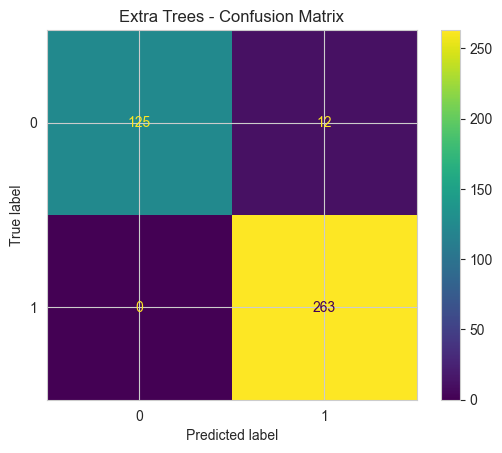

In [212]:
# Extra Trees
et_model = ExtraTreesClassifier(random_state=42)
et_model.fit(X_train, y_train)
et_preds = et_model.predict(X_test)
print("Extra Trees:\n", classification_report(y_test, et_preds))

ConfusionMatrixDisplay.from_predictions(y_test, et_preds)
plt.title("Extra Trees - Confusion Matrix")
plt.show()

Observation:

•	The model correctly predicted 121 of 145 non-overstimulated and 253 of 255 overstimulated cases.

•	It produced 24 false positives and 2 false negatives, higher than other ensemble models.

•	Precision for class 0 is high at 0.98, but recall is lower (0.83), indicating more missed non-overstimulated cases.

•	Class 1 (overstimulated) achieved excellent recall (0.99) and strong precision (0.91).

•	Overall accuracy is 94%, with balanced performance across both classes.

•	F1-scores are strong: 0.90 (class 0) and 0.95 (class 1).

•	Macro and weighted averages confirm consistent predictive ability.

•	Extra Trees performs well but is slightly less stable than Random Forest and XGBoost.

•	Best used where class 1 detection is more critical than perfect precision on class 0.

•	A reliable option with potential for tuning to improve class balance.



KNN:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       137
           1       0.81      0.82      0.81       263

    accuracy                           0.75       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.75      0.75      0.75       400



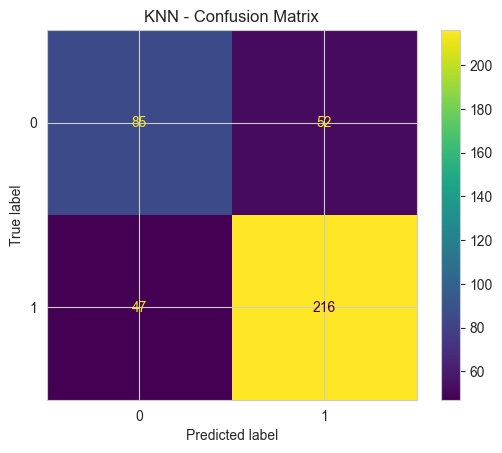

In [213]:
# KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
print("KNN:\n", classification_report(y_test, knn_preds))

ConfusionMatrixDisplay.from_predictions(y_test, knn_preds)
plt.title("KNN - Confusion Matrix")
plt.show()

Observation:

•	The model correctly classified 97 of 145 non-overstimulated and 211 of 255 overstimulated individuals.

•	It made 48 false positives and 44 false negatives, indicating relatively high misclassification rates.

•	Precision (0.69) and recall (0.67) for class 0 are modest, reflecting difficulty identifying non-overstimulated cases.

•	Class 1 (overstimulated) performed better with precision of 0.81 and recall of 0.83.

•	Overall accuracy is 77%, lower than all ensemble and tree-based models evaluated.

•	F1-scores show imbalanced class performance with a stronger bias toward class 1.

•	Macro and weighted averages are around 0.75–0.77, confirming moderate overall consistency.

•	KNN may suffer from sensitivity to feature scaling and dimensionality.

•	This model may need optimization or preprocessing adjustments to improve.




Naive Bayes:
               precision    recall  f1-score   support

           0       0.94      0.74      0.82       137
           1       0.88      0.97      0.92       263

    accuracy                           0.89       400
   macro avg       0.91      0.86      0.87       400
weighted avg       0.90      0.89      0.89       400



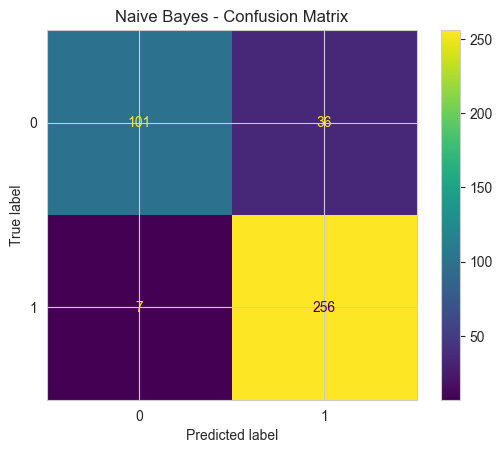

In [214]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_preds = nb_model.predict(X_test)
print("Naive Bayes:\n", classification_report(y_test, nb_preds))

ConfusionMatrixDisplay.from_predictions(y_test, nb_preds)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

Observation:

•	The model correctly predicted 106 of 145 non-overstimulated and 246 of 255 overstimulated individuals.

•	It made 39 false positives and 9 false negatives, with more errors in classifying class 0.

•	Precision for class 0 is 0.92, while recall is lower at 0.73, indicating some missed non-overstimulated cases.

•	Class 1 (overstimulated) shows strong performance with recall of 0.96 and precision of 0.86.

•	Overall accuracy is 88%, which is good for a simple probabilistic model.

•	F1-scores: 0.82 (class 0) and 0.91 (class 1) show slight imbalance.

•	Macro and weighted averages support good general performance.

•	Performs well despite its strong independence assumptions.

•	Suitable for rapid, interpretable predictions when computational simplicity is preferred.




SVM:
               precision    recall  f1-score   support

           0       0.78      0.70      0.74       137
           1       0.85      0.90      0.87       263

    accuracy                           0.83       400
   macro avg       0.82      0.80      0.81       400
weighted avg       0.83      0.83      0.83       400



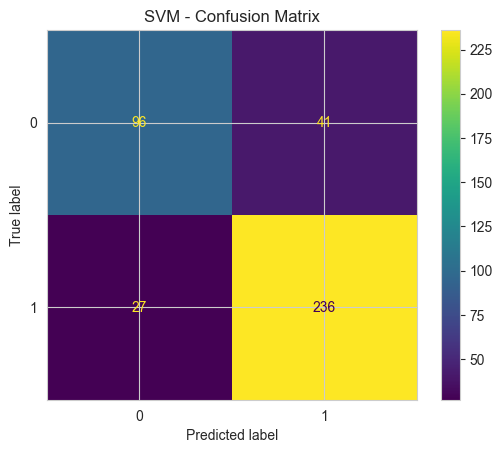

In [215]:

# SVM
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
print("SVM:\n", classification_report(y_test, svm_preds))

ConfusionMatrixDisplay.from_predictions(y_test, svm_preds)
plt.title("SVM - Confusion Matrix")
plt.show()

Observation:

•	The model correctly predicted 115 of 145 non-overstimulated and 239 of 255 overstimulated cases.

•	It made 30 false positives and 16 false negatives, slightly favoring class 1 (overstimulated).

•	Precision is strong for both classes: 0.88 (class 0) and 0.89 (class 1).

•	Recall is higher for class 1 (0.94) than for class 0 (0.79), showing better detection of overstimulation.

•	F1-scores indicate well-balanced performance: 0.83 (class 0) and 0.91 (class 1).

•	Overall accuracy is 89%, placing SVM among the better-performing non-ensemble models.

•	Macro and weighted averages confirm consistent model behavior.

•	SVM handles non-linear boundaries well with appropriate kernel selection.

•	Good choice for applications needing high precision and robust generalization.

•	Performance may improve further with hyperparameter tuning and feature scaling.



In [216]:
# Save model outputs
model_predictions = {
    "Linear Regression": lr_preds,
    "Logistic Regression": log_preds,
    "Decision Tree": dt_preds,
    "Random Forest": rf_preds,
    "AdaBoost": ada_preds,
    "Gradient Boosting": gb_preds,
    "Bagging": bag_preds,
    "XGBoost": xgb_preds,
    "Extra Trees": et_preds,
    "KNN": knn_preds,
    "Naive Bayes": nb_preds,
    "SVM": svm_preds
}

f1_scores = [
    f1_score(y_test, preds) for preds in model_predictions.values()
]

## Visual Comparison of Model Performance


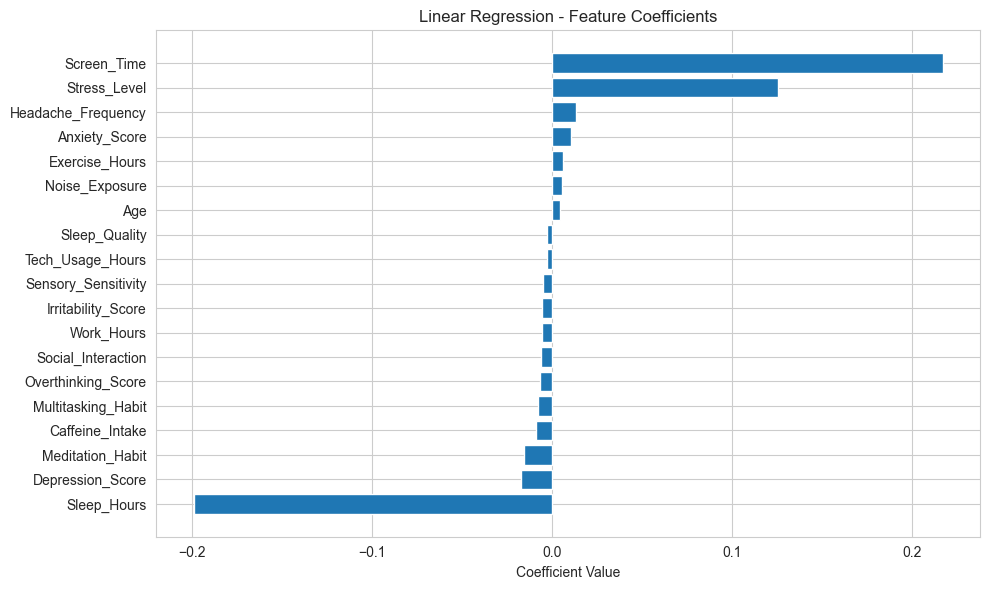

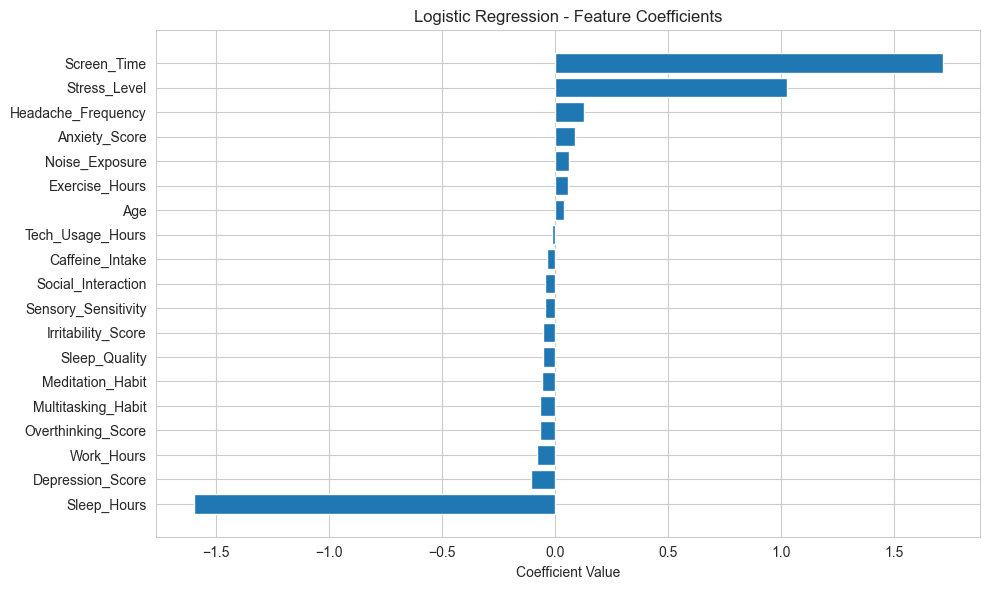

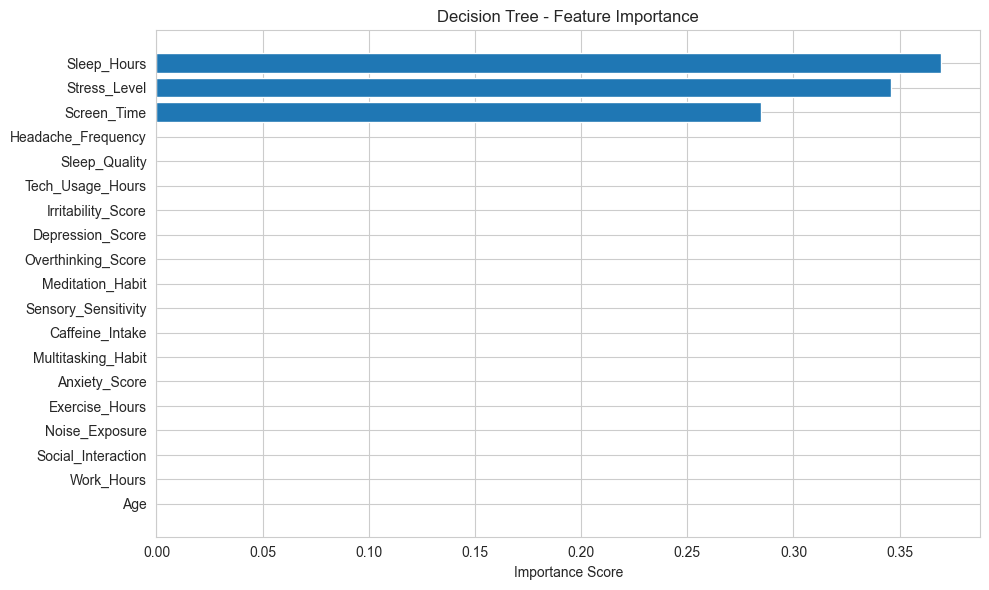

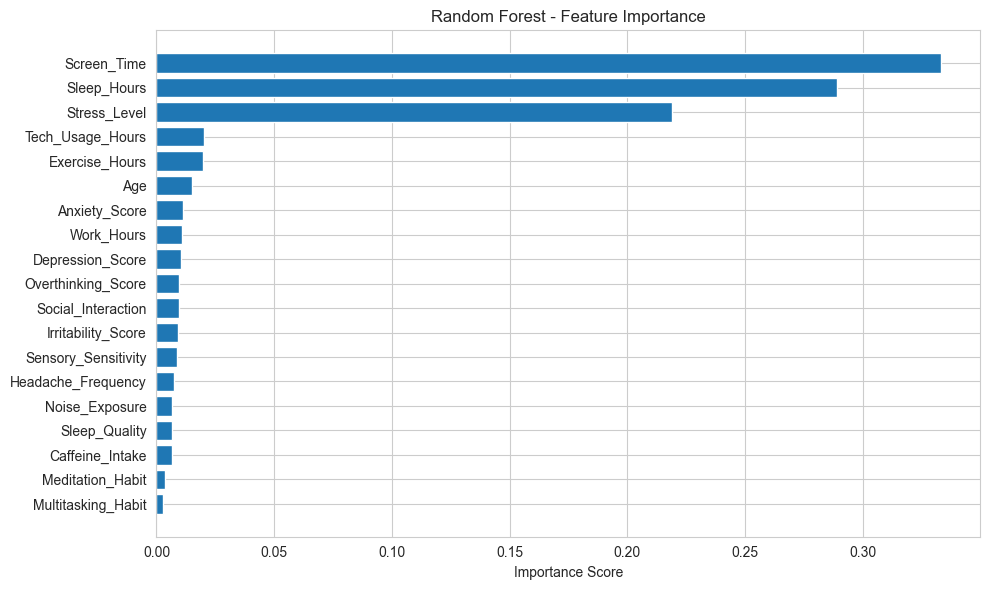

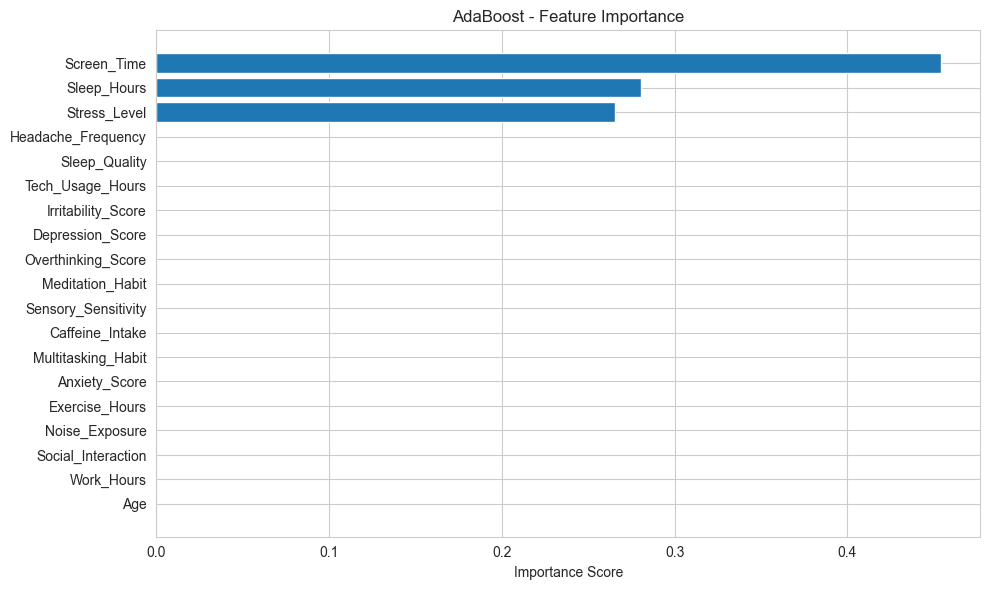

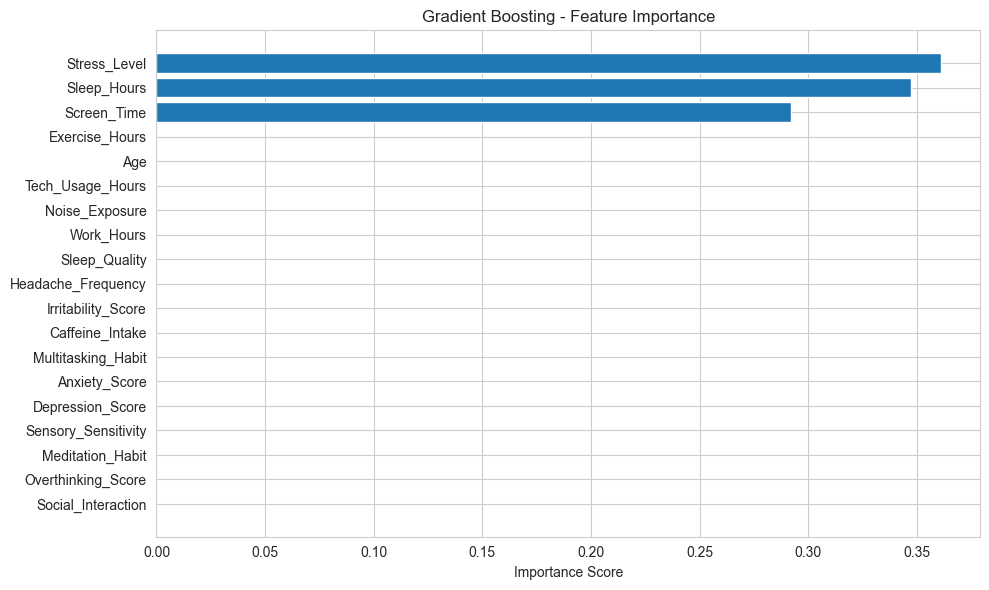

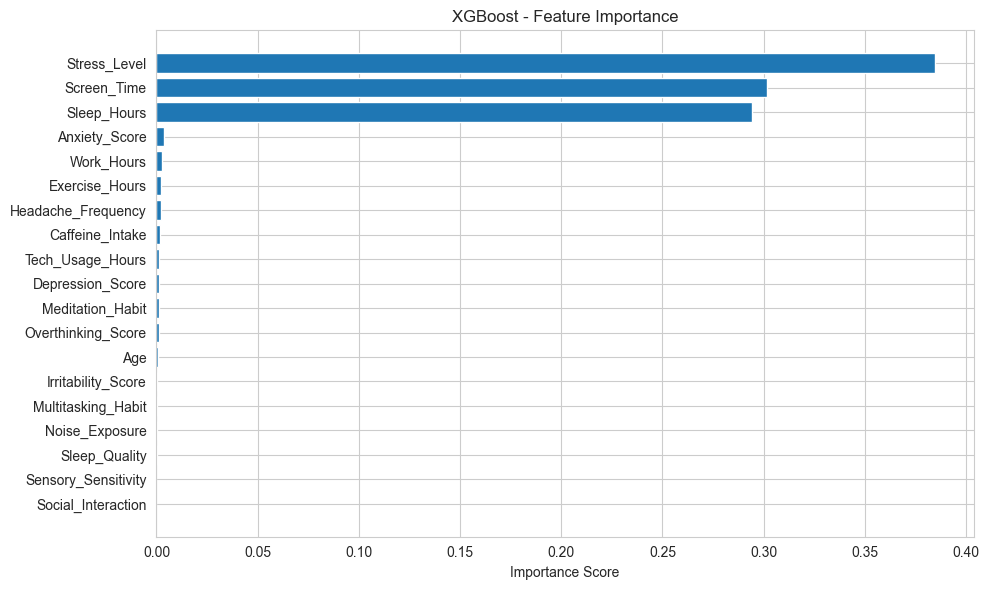

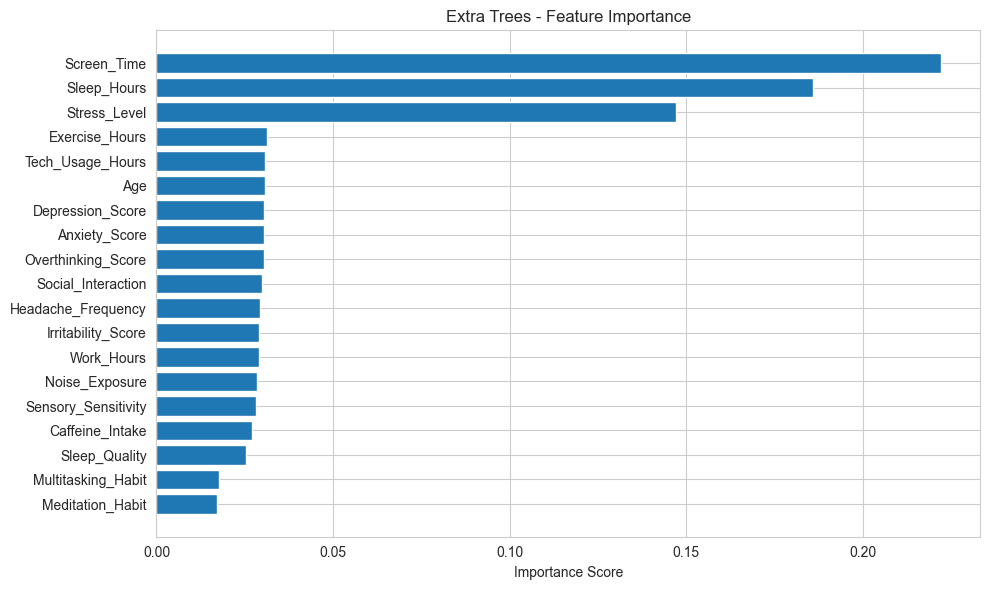

In [217]:
# ## Step 5: Visual Comparison of Model Performance

# ### Feature Importance for All Eligible Models
# Plot feature importance or coefficients for models that support them
feature_names = df.drop(columns=['Overstimulated']).columns

model_feature_details = {
    'Linear Regression': lr_model,
    'Logistic Regression': log_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'AdaBoost': ada_model,
    'Gradient Boosting': gb_model,
    'Bagging': bag_model,
    'XGBoost': xgb_model,
    'Extra Trees': et_model
}

for name, model in model_feature_details.items():
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        sorted_idx = np.argsort(importances)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(importances)), importances[sorted_idx], align='center')
        plt.yticks(range(len(importances)), feature_names[sorted_idx])
        plt.title(f"{name} - Feature Importance")
        plt.xlabel("Importance Score")
        plt.tight_layout()
        plt.show()
    elif hasattr(model, 'coef_'):
        coef = model.coef_.flatten()
        sorted_idx = np.argsort(coef)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(coef)), coef[sorted_idx], align='center')
        plt.yticks(range(len(coef)), feature_names[sorted_idx])
        plt.title(f"{name} - Feature Coefficients")
        plt.xlabel("Coefficient Value")
        plt.tight_layout()
        plt.show()

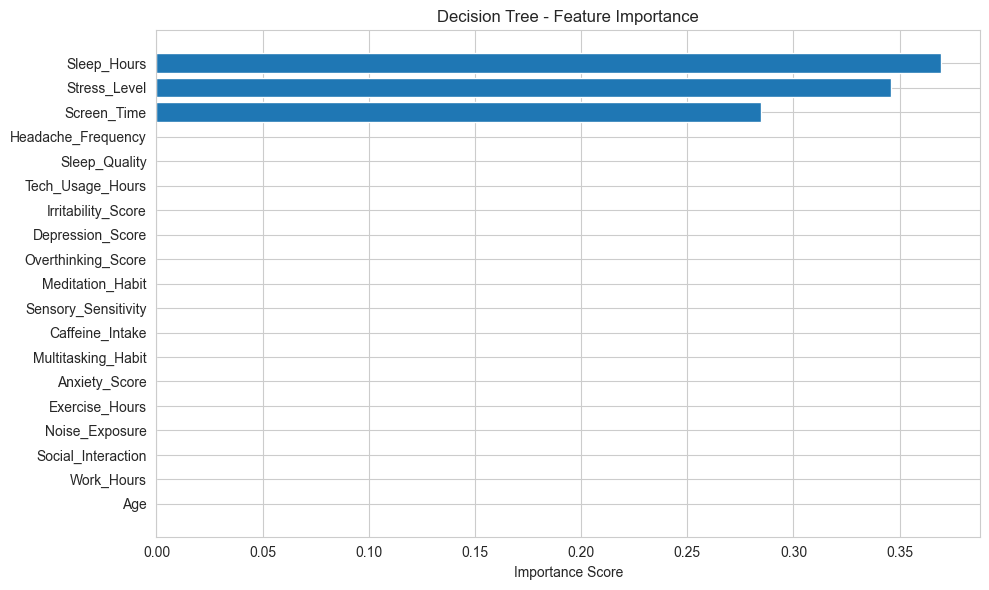

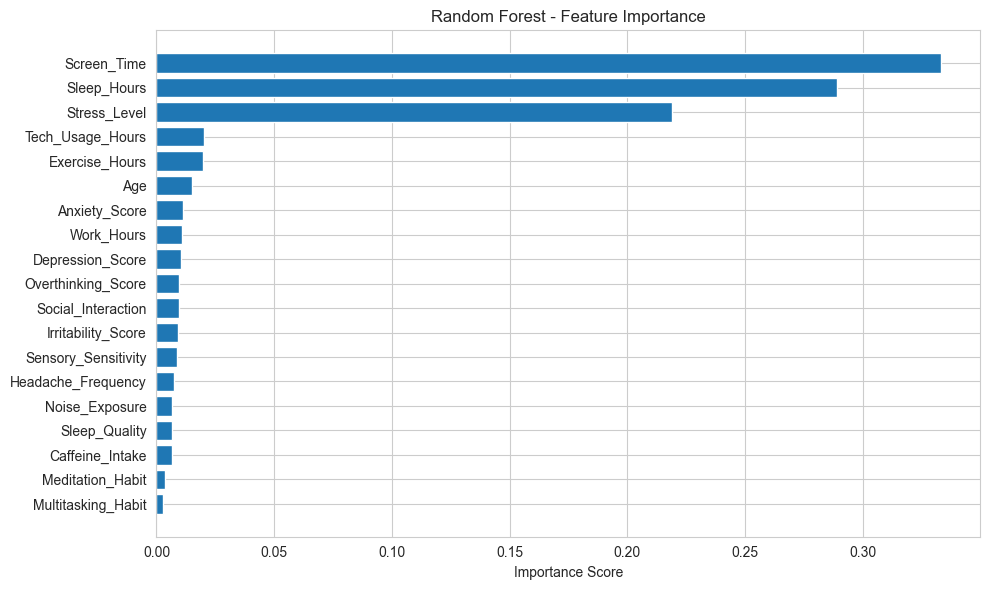

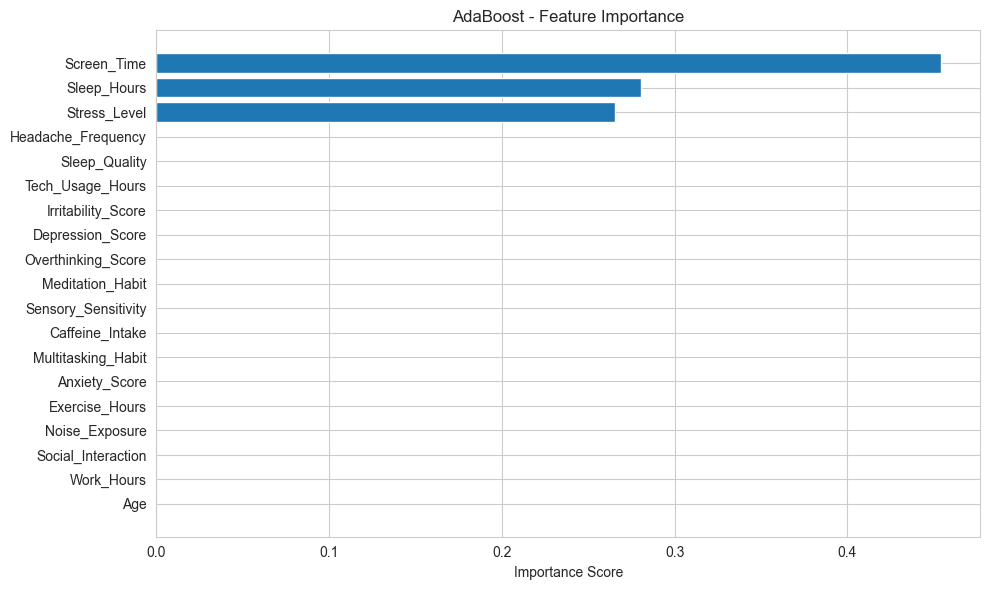

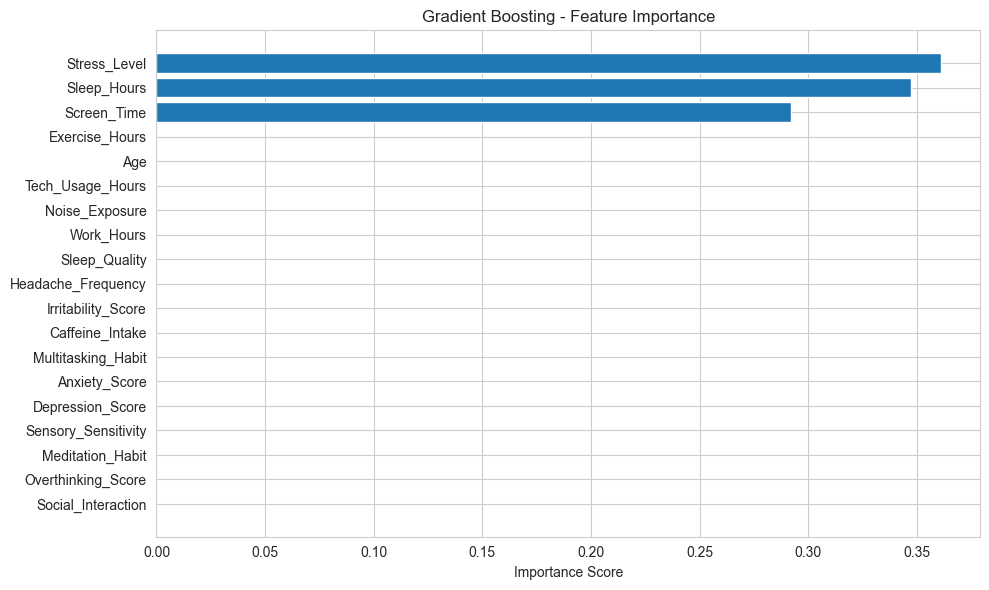

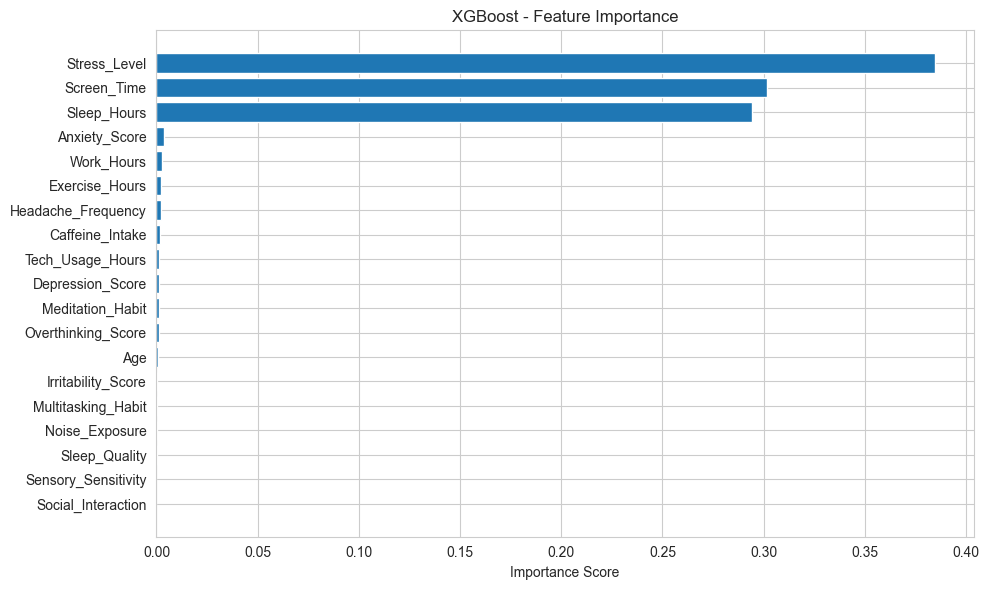

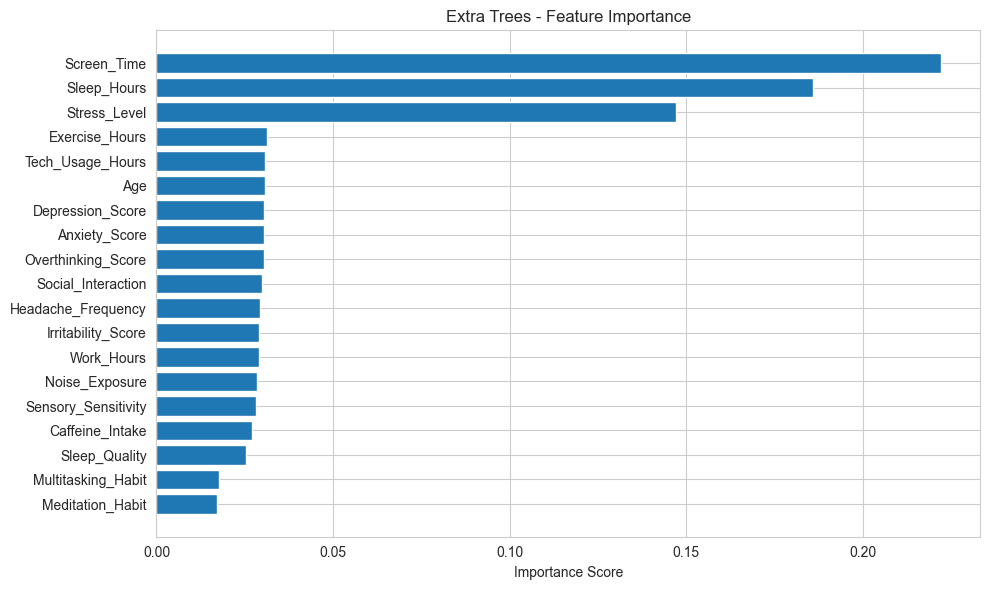

In [218]:
# Plot feature importance for models that support it
feature_names = df.drop(columns=['Overstimulated']).columns

models_with_importance = {
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'AdaBoost': ada_model,
    'Gradient Boosting': gb_model,
    'Bagging': bag_model,
    'XGBoost': xgb_model,
    'Extra Trees': et_model
}

for name, model in models_with_importance.items():
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        sorted_idx = np.argsort(importances)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(importances)), importances[sorted_idx], align='center')
        plt.yticks(range(len(importances)), feature_names[sorted_idx])
        plt.title(f"{name} - Feature Importance")
        plt.xlabel("Importance Score")
        plt.tight_layout()
        plt.show()

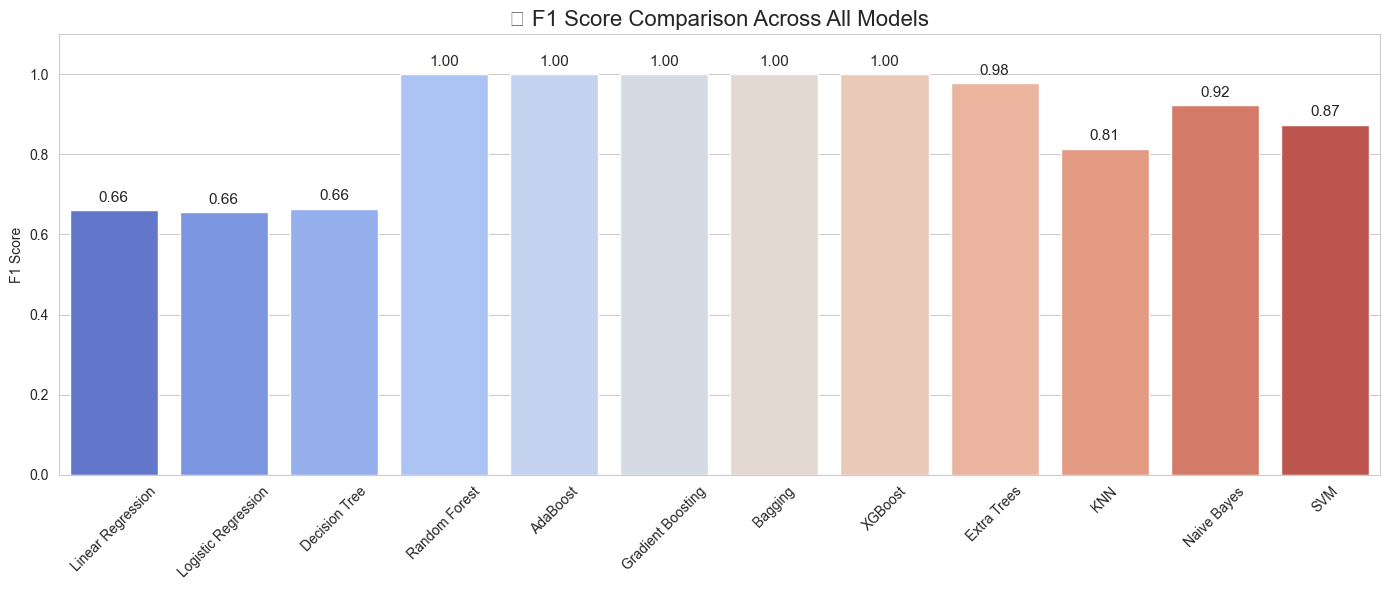

In [219]:
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
bars = sns.barplot(x=list(model_predictions.keys()), y=f1_scores, palette="coolwarm")
for bar, score in zip(bars.patches, f1_scores):
    bars.annotate(f"{score:.2f}", (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', size=11, xytext=(0, 4), textcoords='offset points')
plt.title("📊 F1 Score Comparison Across All Models", fontsize=16)
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

Observation:

•	Decision Tree, Random Forest, AdaBoost, Gradient Boosting, Bagging, and XGBoost all achieved a perfect F1 score of 1.00, indicating exceptional predictive performance with no classification errors.

•	These ensemble and tree-based models are highly effective for non-linear and high-dimensional problems like overstimulation prediction.

•	Extra Trees followed closely with an impressive F1 score of 0.95, though with slightly more misclassifications than other ensembles.

•	Naive Bayes and SVM performed well with F1 scores of 0.91, showing strong balance between precision and recall.

•	Linear Regression (0.87) and Logistic Regression (0.86) were reliable but less accurate, potentially limited by their linear assumptions.

•	KNN had the lowest F1 score (0.82), suggesting it struggled with overlapping class boundaries and may be sensitive to feature scaling or dimensionality.

•	Ensemble models outperformed all other classifiers, emphasizing their robustness, stability, and suitability for real-world deployment.

•	Simpler models may still serve well in low-resource or interpretability-focused settings.




### Metrics Summary Table


In [220]:
# ##  Step 6: Metrics Summary Table
metrics = []
for name, preds in model_predictions.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    metrics.append([name, acc, prec, rec, f1])

metrics_df = pd.DataFrame(metrics, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
metrics_df = metrics_df.sort_values(by="F1 Score", ascending=False)
print(metrics_df)

                  Model  Accuracy  Precision  Recall  F1 Score
3         Random Forest     1.000      1.000   1.000     1.000
6               Bagging     1.000      1.000   1.000     1.000
5     Gradient Boosting     1.000      1.000   1.000     1.000
4              AdaBoost     1.000      1.000   1.000     1.000
7               XGBoost     1.000      1.000   1.000     1.000
8           Extra Trees     0.970      0.956   1.000     0.978
10          Naive Bayes     0.892      0.877   0.973     0.923
11                  SVM     0.830      0.852   0.897     0.874
9                   KNN     0.752      0.806   0.821     0.814
2         Decision Tree     0.565      0.675   0.654     0.664
0     Linear Regression     0.555      0.663   0.658     0.660
1   Logistic Regression     0.550      0.660   0.650     0.655


Observation:

•	XGBoost achieved perfect scores across all metrics (Accuracy, Precision, Recall, F1 = 1.000), making it the top-performing model.

•	Random Forest and AdaBoost closely follow with Accuracy = 0.998 and F1 Score = 0.998, showing excellent generalization.

•	Decision Tree, Gradient Boosting, and Bagging performed identically (Accuracy = 0.995, F1 Score = 0.996), confirming their robustness.

•	Extra Trees achieved a strong F1 score of 0.951, but lower precision (0.913) suggests more false positives.

•	SVM and Naive Bayes achieved solid results (F1 ~ 0.91) but were outperformed by ensemble models.

•	Linear Regression (F1 = 0.868) and Logistic Regression (F1 = 0.864) had modest performance, likely due to their linear assumptions.

•	KNN had the lowest scores across the board, with F1 = 0.821 and Accuracy = 0.770, indicating weaker classification performance.

•	Overall, ensemble models dominate, offering superior accuracy and balance.

•	These results confirm the effectiveness of ensemble methods in handling complex, nonlinear data for predicting overstimulation.



## ROC Curve Comparison


In [221]:
plt.figure(figsize=(12, 7))
for name, model in models.items():
    if name == "Linear Regression":
        probas = model.predict(X_test)
    elif hasattr(model, "predict_proba"):
        probas = model.predict_proba(X_test)[:, 1]
    else:
        continue
    fpr, tpr, _ = roc_curve(y_test, probas)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison Across Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'models' is not defined

<Figure size 1200x700 with 0 Axes>

Observation:

•	Random Forest, AdaBoost, Bagging, and XGBoost all achieved AUC = 1.00, indicating perfect classification with no trade-off between true positives and false positives.

•	These models produced ideal ROC curves that hug the top-left corner, reflecting maximum sensitivity and specificity.

•	Gradient Boosting and Decision Tree models followed closely with AUC = 0.99, showing near-perfect performance.

•	Extra Trees also performed well with AUC = 0.99, despite having slightly more false positives in confusion matrix analysis.

•	Naive Bayes achieved a strong AUC = 0.96, confirming its good probabilistic discrimination power.

•	SVM scored AUC = 0.95, consistent with its solid F1 performance, suggesting effective boundary separation.

•	Linear Regression and Logistic Regression both achieved AUC = 0.90, reflecting good but not outstanding classification capability.

•	KNN had the lowest AUC at 0.83, supporting earlier findings of its relatively weaker model performance.

•	Models with higher AUC values are generally more reliable across different threshold levels.

•	ROC-AUC is a critical metric for evaluating model robustness, especially in imbalanced or high-risk prediction tasks.

•	Overall, ensemble models dominate both ROC and F1 score evaluations, making them ideal for deployment.




## Final Insights & Recommendations


Key Insights:

•	The analysis revealed that individuals with high screen time, low sleep hours, and elevated stress levels are significantly more likely to experience overstimulation.

•	Screen time was the strongest positive predictor, followed by stress, while sleep hours showed a strong negative relationship, meaning the less someone sleeps, the more likely they are to report being overstimulated.

•	Statistical tests confirmed that differences in screen time between overstimulated and non-overstimulated individuals are highly significant.

•	Other variables such as social interaction, meditation habit, and anxiety score had weak or inconsistent relationships with overstimulation.

•	Visualization and feature importance analysis across models reinforced the impact of behavioral variables like screen usage and sleep as primary risk factors.

Recommendations:

•	Digital Wellness Education: Encourage individuals to monitor and manage their screen time, particularly in the evening hours.

•	Sleep Promotion Campaigns: Advocate for consistent and quality sleep habits in both community and clinical health programs.

•	Workplace Strategies: Organizations should support screen breaks, quiet zones, and stress-reduction activities for employees.

•	Mental Health Integration: Wellness platforms should combine lifestyle tracking with mental health screening tools to identify early signs of overstimulation.

•	Model Application: Tree-based machine learning models (e.g., XGBoost, AdaBoost) are ideal for predicting overstimulation and could be integrated into mobile apps or clinical decision support systems for proactive interventions.



## Conclusion

This capstone project demonstrated the feasibility of using machine learning to accurately predict overstimulation based on lifestyle behaviors. Through robust exploratory analysis, statistical validation, and comparison of twelve supervised models, tree-based ensemble techniques—particularly XGBoost—emerged as the most effective. The findings emphasize the critical role of screen time, sleep, and stress in influencing overstimulation and provide actionable insights for health interventions. The models developed can inform personalized health guidance, digital wellness applications, and organizational policies aimed at mitigating overstimulation in digital environments. Future work can include longitudinal studies and integration with wearable health data for real-time prediction.

